# Group 4 Phase 2 Project
This notebook contains code merged from 2 notebooks.
Contributors: Austin, Emmanuel, Ronny, and others from Group 4.


## Code from recommender


# Investment Type Recommender System

## Business Understanding

### Overview
Many Kenyans, especially young adults and first-time investors, struggle to identify investment avenues that align with their financial goals, risk appetite, and income level. The lack of personalized financial guidance often leads to poor or delayed investment decisions.

### Challenges
- **Low financial literacy and accessibility to advisory services**  
  Many potential investors lack foundational knowledge or support systems to understand available investment options or evaluate their suitability.

- **Overwhelming investment options**  
  The abundance of options—such as SACCOs, stocks, real estate, government bonds, and money market funds—can be confusing and lead to decision fatigue.

- **One-size-fits-all investment marketing**  
  Most financial institutions promote products generically, failing to account for individual goals, income, and risk profiles.

- **Lack of data-driven tools for personalized investment planning**  
  There is limited availability of intelligent systems to assist users in navigating investments based on their unique profiles.

- **Distrust and fear of loss**  
  Without adequate knowledge or guidance, potential investors may fear financial loss or fall victim to scams, leading to investment hesitation.

### Proposed Solution
A **machine learning-based recommender system** that suggests ideal investment types based on a user's financial profile, risk tolerance, and goals. This system can help both fintech platforms and financial institutions deliver personalized advisory services at scale.

### Brief Conclusion
By guiding users toward the most suitable investment types, this solution aims to enhance financial inclusion and support smarter, confidence-driven investment decisions.


## Problem Statement
Many individuals, especially in emerging markets, face significant challenges in making informed investment decisions due to limited financial literacy and lack of personalized advisory services. The wide range of available investment options—SACCOs, stocks, real estate, government bonds, and money market funds—can be overwhelming without guidance. Additionally, the generic approach in investment marketing overlooks the diverse financial goals, income levels, and risk appetites of potential investors, leading to poor financial outcomes and disengagement from long-term wealth-building.


## Objectives

- **Analysis-Based**  
  Understand investment behaviors among Kenyan users and segment them based on patterns.

- **Feature Engineering-Based**  
  Create user profiles using financial behavior indicators such as:
  - Income level
  - Savings rate
  - Age
  - Financial goals

- **Modeling-Based**  
  Build and evaluate recommender models, including:
  - Content-based filtering
  - Hybrid approaches (clustering + classification)


## Data Understanding

### Data Sourcing
- Publicly available financial survey data (e.g., **FinAccess Kenya survey**)
- Simulated user profiles or anonymized fintech customer data
- Investment platform usage data (e.g., user interest in asset types)
- Economic indicators (e.g., interest rates, inflation)

### Features and Relevance
- Demographics: Age, gender, location  
- Financials: Income, expenses, debt levels  
- Profile: Risk profile (low/medium/high)  
- Preferences: Investment goals (short-term/long-term, passive/active)  
- History: Past investment experience


## Data Preparation

### Format
- Data will be collected and processed in **Excel format**

### Actions
- Handle missing values
- Encode categorical variables
- Normalize numeric fields
- Create derived features (e.g., savings rate, risk-adjusted return scores)
- Segment data by user type or financial tier


## Deployment

### API
- **Framework:** FastAPI  
- **Endpoints:** Accept user profile data and return recommended investment type(s)  
- **Model Storage:** Serialized using `.pkl` or `.joblib`

### UI
- **Framework:** Streamlit  
- **Function:** Allows users to input financial info and receive personalized investment suggestions

### Prototypes / Mockups
- **Key Screens:**
  - Welcome Screen
  - Financial Profile Input
  - Investment Suggestions


In cell below we import libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load data

file_path = "../data/2024_Finaccess_Publicdata.xlsx"

invest_df = pd.read_excel(file_path)
invest_df.head()

interview__key                     interview__id    county   A07    A08  \
0    21-61-43-44  00005e63e7424aa19e63adb071955233   Garissa   225  Urban   
1    87-78-54-60  000718d26f5942998522033a66594b4c   Garissa   223  Urban   
2    32-71-19-84  0008721681d2468aa1ef456bba4475dc     Busia  1514  Urban   
3    48-18-78-99  00099e961d49470585c1a7f49fa3b7fb    Kiambu   796  Urban   
4    50-82-98-89  000bb72e959b4dd48443da902c01e920  Murang'a   763  Urban   

   A10                           Interview_Status             A9i         Z1  \
0    1  Household found with competent respondent  Access granted  completed   
1    3  Household found with competent respondent  Access granted  completed   
2    3  Household found with competent respondent  Access granted  completed   
3    3  Household found with competent respondent  Access granted  completed   
4   16  Household found with competent respondent  Access granted  completed   

      A13  ...  sacco_redress  mobilemoney_redress  mobilebank_redress  \
0    Male  ...            NaN                  NaN                 NaN   
1    Male  ...            NaN                  NaN                 NaN   
2  Female  ...            NaN                  NaN                 NaN   
3    Male  ...            NaN                  NaN                 NaN   
4  Female  ...            NaN                  NaN                 NaN   

   not_registered_mmoney_24 using_someone_acc insurance_including_NHIF_use  \
0                        No               NaN                   Never used   
1                        No               NaN                   Never used   
2                        No               NaN                   Never used   
3                        No               NaN                   Never used   
4                        No               Yes                   Never used   

   All_Insurance_excluding_NHIF_use                 PWD  Latitude  Longitude  
0                        Never used  Without Disability -0.435423  39.636586  
1                        Never used  Without Disability  0.058794  40.305006  
2                        Never used  Without Disability  0.636836  34.277390  
3                        Never used  Without Disability -1.251917  36.719076  
4                        Never used  Without Disability -0.795820  37.131085  

[5 rows x 3816 columns]

In [3]:
# check shape of data

invest_df.shape

(20871, 3816)

The output above shows that dataset contains **20871 entries and 3816 columns**. 

In cell below we check for metadata summary and numeric summary

In [4]:
# check metadata summary & numeric

def data_summary(df):
    print("-----info-----")
    df.info()

    print("-----describe-----")
    df.describe()

    return df


data_summary(invest_df)



-----info-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20871 entries, 0 to 20870
Columns: 3816 entries, interview__key to Longitude
dtypes: float64(2303), int64(185), object(1328)
memory usage: 607.6+ MB
-----describe-----


interview__key                     interview__id        county   A07  \
0        21-61-43-44  00005e63e7424aa19e63adb071955233       Garissa   225   
1        87-78-54-60  000718d26f5942998522033a66594b4c       Garissa   223   
2        32-71-19-84  0008721681d2468aa1ef456bba4475dc         Busia  1514   
3        48-18-78-99  00099e961d49470585c1a7f49fa3b7fb        Kiambu   796   
4        50-82-98-89  000bb72e959b4dd48443da902c01e920      Murang'a   763   
...              ...                               ...           ...   ...   
20866    96-94-76-93  ffefe104529e439fb916d956d10a9dc0         Wajir  1847   
20867    40-55-72-03  fff39eec827f4ddc90e73a0792092bf9  Nairobi City  1815   
20868    10-75-82-28  fff70af11a2e49649feae012317ce7d5          Embu   443   
20869    77-66-40-97  fff8b3b628df4b67889e26af8df90ef7  Taita-Taveta   213   
20870    09-26-74-74  fffe9b46c1014de9be537c63c210014c         Kisii  1706   

         A08  A10                           Interview_Status             A9i  \
0      Urban    1  Household found with competent respondent  Access granted   
1      Urban    3  Household found with competent respondent  Access granted   
2      Urban    3  Household found with competent respondent  Access granted   
3      Urban    3  Household found with competent respondent  Access granted   
4      Urban   16  Household found with competent respondent  Access granted   
...      ...  ...                                        ...             ...   
20866  Rural    1  Household found with competent respondent  Access granted   
20867  Urban   25  Household found with competent respondent  Access granted   
20868  Rural    1  Household found with competent respondent  Access granted   
20869  Urban    1  Household found with competent respondent  Access granted   
20870  Rural    1  Household found with competent respondent  Access granted   

              Z1     A13  ...  sacco_redress  mobilemoney_redress  \
0      completed    Male  ...            NaN                  NaN   
1      completed    Male  ...            NaN                  NaN   
2      completed  Female  ...            NaN                  NaN   
3      completed    Male  ...            NaN                  NaN   
4      completed  Female  ...            NaN                  NaN   
...          ...     ...  ...            ...                  ...   
20866  completed    Male  ...            NaN                  NaN   
20867  completed  Female  ...            NaN                  NaN   
20868  completed    Male  ...            NaN                  NaN   
20869  completed  Female  ...            NaN                  NaN   
20870  completed    Male  ...            NaN                  NaN   

       mobilebank_redress  not_registered_mmoney_24 using_someone_acc  \
0                     NaN                        No               NaN   
1                     NaN                        No               NaN   
2                     NaN                        No               NaN   
3                     NaN                        No               NaN   
4                     NaN                        No               Yes   
...                   ...                       ...               ...   
20866                 NaN                        No               NaN   
20867                 NaN                        No               NaN   
20868                 NaN                        No               NaN   
20869                 NaN                        No               NaN   
20870                 NaN                       Yes                No   

      insurance_including_NHIF_use  All_Insurance_excluding_NHIF_use  \
0                       Never used                        Never used   
1                       Never used                        Never used   
2                       Never used                        Never used   
3                       Never used                        Never used   
4                       Never used        

The ouput above shows dataset contains total `20871 entries`and  `3816 columns` in which `2303 columns are float`, `185 integers` and `1328 object` 

### Basic Data cleaning

In cell below we inspect data and drop all columns not needed based on domain knowledge and data description, then check for missing values, duplicates, standadize all categorical data to lower case and remove white, and impute for the missing values

In cell below we check for the missing values and impute them for efficient feature engineering

In [7]:
# check for missing values

def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
   
    return missing

missing_values(invest_df)


M10i       20871
N11bi      20871
K5i        20871
J3__187    20871
J3__188    20871
           ...  
B2Eii          1
B2Ei           1
B2F            1
B2D            1
A24iii         1
Length: 3318, dtype: int64

for `numeric_values` we impute with **median** and for `categorical` we use **mode** or **unknown**. we drop columns we much missing values.


In [8]:
# make copy of original data

invest_df_copy = invest_df.copy()

In [9]:
# Drop columns with much missing values
def drop_columns(df, columns_missing):
    df_cleaned = df.drop(columns=columns_missing, axis=1, errors='ignore')  # errors='ignore' handles any misnamed columns gracefully
    print(f"Dropped {len(columns_missing)} columns.")
    return df_cleaned

entries = [
    'investment_redress', 'pension_redress', 'mobilebank_redress', 'sacco_redress', 'creditonly_redress',
    'trad_mfi_satisfaction', 'bank_redress', 'insurance_redress', 'trad_mfi_moneylost', 'trad_mfi_unsolicited',
    'trad_mfi_downtime', 'trad_mfi_unexpectedcharges', 'trad_mfi_unethicalrecovery', 'digital_app_satisfaction',
    'digital_app_moneylost', 'digital_app_unsolicited', 'digitalapps_unexpectedcharges', 'digital_app_downtime',
    'digital_apps_unethicalrecovery', 'traditional_mfi_issues', 'investment_unexpectedcharges_fnl',
    'investment_sold_fnl', 'investment_lostmoney_fnl', 'investment_downtime_fnl', 'investment_issues_fnl',
    'investment_satisfaction', 'digital_issues', 'hirepurchase_satisfaction', 'hirepurchase_moneylost',
    'hirepurchase_downtime', 'hirepurchase_unexpectedcharges', 'hirepurchase_unsolicited',
    'hirepurchase_unethicalrecovery', 'hirepurchase_issues', 'mobilemoney_redress',
    'creditonlyagree_satisfactionl', 'creditonly_mfi_moneylost', 'creditonly_mfi_downtime',
    'creditonly_mfi_unsolicited', 'creditonly_mfi_unexpectedcharges', 'creditonly_mfi_unethicalrecovery',
    'creditonly_mfi_issues', 'pension_unethical_fnl', 'pension_underpayment_fnl', 'pension_attachment',
    'pension_delayed_fnl', 'pension_issues_fnl', 'pension_satisfaction', 'pension_lostmoney_fnl',
    'sacco_unexpectedcharges'
]


invest_df_copy = drop_columns(invest_df_copy, entries)



Dropped 50 columns.


In cell above we drop all columns with much missing value. Below we proceed to impute missing for both `numeric_values` and `categorical_values`.

In [43]:
# impute missing values for both numeric_values and categorical values

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def impute_missing_values(df):
    """Impute missing values: numeric with median, categorical with mode or 'unknown'."""
    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue
        if df[col].dtype in ['float64', 'int64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
            else:
                df[col].fillna('unknown', inplace=True)
    print("Imputed missing values for all applicable columns.")
    return df

invest_df_copy = impute_missing_values(invest_df_copy)


c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Me

Imputed missing values for all applicable columns.


In [11]:
# check for missing values after imputing

invest_df_copy.isnull().sum()

interview__key                      0
interview__id                       0
county                              0
A07                                 0
A08                                 0
                                   ..
insurance_including_NHIF_use        0
All_Insurance_excluding_NHIF_use    0
PWD                                 0
Latitude                            0
Longitude                           0
Length: 3767, dtype: int64

In [12]:
# check for duplicates

invest_df_copy.duplicated().sum()

np.int64(0)

**No duplicates** found. Below we `standardize categorical data` by standardizing all letters to lower, and removing whitespace  

In [13]:
# standardize categorical data

def clean_cat_text(df):
    cat_cols = df.select_dtypes(include="object").columns
    for col in cat_cols:
        df[col] = df[col].astype(str).str.strip().str.lower()
    print("standardized all categorical text to lowercase and stripped whitespace")

    return df

invest_df_copy = clean_cat_text(invest_df_copy)
invest_df_copy.head()

standardized all categorical text to lowercase and stripped whitespace


interview__key                     interview__id    county   A07    A08  \
0    21-61-43-44  00005e63e7424aa19e63adb071955233   garissa   225  urban   
1    87-78-54-60  000718d26f5942998522033a66594b4c   garissa   223  urban   
2    32-71-19-84  0008721681d2468aa1ef456bba4475dc     busia  1514  urban   
3    48-18-78-99  00099e961d49470585c1a7f49fa3b7fb    kiambu   796  urban   
4    50-82-98-89  000bb72e959b4dd48443da902c01e920  murang'a   763  urban   

   A10                           Interview_Status             A9i         Z1  \
0    1  household found with competent respondent  access granted  completed   
1    3  household found with competent respondent  access granted  completed   
2    3  household found with competent respondent  access granted  completed   
3    3  household found with competent respondent  access granted  completed   
4   16  household found with competent respondent  access granted  completed   

      A13  ...  sacco_satisfaction  mobilemoney_satisfaction  \
0    male  ...           satisfied                 satisfied   
1    male  ...           satisfied                 satisfied   
2  female  ...           satisfied                 satisfied   
3    male  ...           satisfied                 satisfied   
4  female  ...           satisfied                 satisfied   

   mobilebank_satisfaction  not_registered_mmoney_24 using_someone_acc  \
0                satisfied                        no               yes   
1                satisfied                        no               yes   
2                satisfied                        no               yes   
3                satisfied                        no               yes   
4                satisfied                        no               yes   

  insurance_including_NHIF_use  All_Insurance_excluding_NHIF_use  \
0                   never used                        never used   
1                   never used                        never used   
2                   never used                        never used   
3                   never used                        never used   
4                   never used                        never used   

                  PWD  Latitude  Longitude  
0  without disability -0.435423  39.636586  
1  without disability  0.058794  40.305006  
2  without disability  0.636836  34.277390  
3  without disability -1.251917  36.719076  
4  without disability -0.795820  37.131085  

[5 rows x 3767 columns]

### **Preparing data for recommeder system & Feature engineering**

This project focuses on developing a **machine learning-based recommender system designed to suggest appropriate investment products tailored to a user's financial profile, risk tolerance, and personal goals**. To support this, we begun by preparing the dataset through a structured process that includes selecting relevant features, renaming columns for readability, and performing necessary cleaning and exploratory analysis.

We have chosen to implement a **content-based filtering** approach for the recommendation engine. **This decision is guided by the nature of the FinAccess 2024 dataset, which consists of aggregated survey responses rather than individual user-product interaction data**. Collaborative filtering methods such as ALS or SVD typically rely on user-level histories and are therefore not applicable in this context.

Instead, content-based filtering allows us to leverage the dataset's rich demographic and behavioral attributes such as age, gender, region, education level, trust in financial institutions, and satisfaction with financial products to make informed recommendations. By aligning a new user’s profile with patterns observed in similar demographic segments, we can suggest investment options that are likely to be suitable and relevant.

The recommender system works by capturing key user inputs (such as age group, gender, education, region), identifying similar profiles within the dataset, analyzing common or highly rated financial products within those segments, and recommending those products to the user. This personalized, profile-driven approach offers a practical and data-informed way to support individuals in making better investment decisions.


As our data is recorded in `household-level` and not individual-level we treat each household as the user. The unit of our recommendation is per household not per person. we feature engineer columns such as `has_account`, `has_savings`, `receives_remittance`. `We create new binary` features to show **presence or absence** of certern financial behaviours, that is whether any household member uses a savings methods or owns a phone

In cell below we preapare our **X features** and **y feature**, based on the following features from data



- **demographics & preferences**

- **current or past product usage**

- **user preferences**

- **Trust & digital access** 

we start by recording our `items to recommend` which is **investment types**. Then we define features to represent **User profile** those describe household such as `financial access`, `saving behaviour`, `Risk attitude`, `income level`, `education level` and `Household size`, `Digital literacy`

Below we usse `cosine_similarity` to create vectors for recommendation. As we have `user profile` and `investment options` for each household we know which investment methods they use and want to recommend more suitable ones, possibly those they haven't used but similar to what similar household use.

In [ ]:


# Select Relevant Columns
relevant_cols = [
    "A08",              
    "A13",              
    "B3Ii",             
    "U23",              
    "C1_1a",            
    "C1_2",             
    "C1_4",             
    "C1_6",             
    "C1_9",             
    "C1_15",            
    "C1_17",            
    "C1_19",            
    "C1_25",            
    "C1_35"             
]
df_subset = invest_df_copy[relevant_cols].copy()

# Rename Columns 
df_subset.columns = [
    "area_type", "gender", "monthly_income", "monthly_expenditure",
    "save_bank", "save_mobile_money", "save_sacco", "save_friends", "save_digital",
    "loan_mobile", "loan_sacco", "loan_digital", "loan_family", "invest_forex"
]


In [ ]:
#Map Usage Levels to Ordinal 
usage_map = {
    "Never used": 0,
    "Used to use": 1,
    "Currently use": 2,
    pd.NA: 0,
    None: 0
}
behavior_cols = [
    'save_bank', 'save_mobile_money', 'save_sacco', 'save_friends', 'save_digital',
    'loan_mobile', 'loan_sacco', 'loan_digital', 'loan_family', 'invest_forex'
]
df_subset[behavior_cols] = df_subset[behavior_cols].applymap(lambda x: usage_map.get(x, 0))


In [ ]:

# Encode Demographics
df_subset['gender'] = df_subset['gender'].map({'Male': 0, 'Female': 1})
df_subset['area_type'] = df_subset['area_type'].map({'Rural': 0, 'Urban': 1})

In [ ]:
# Fill Missing Numeric Data 
df_subset['monthly_income'] = df_subset['monthly_income'].fillna(df_subset['monthly_income'].median())
df_subset['monthly_expenditure'] = df_subset['monthly_expenditure'].fillna(df_subset['monthly_expenditure'].median())

#Scale Features 
scaler = StandardScaler()
household_scaled = scaler.fit_transform(df_subset)


c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
#Create 3 Dummy Investment Profiles
investment_profiles = pd.DataFrame([
    [1, 1, 0.3, 0.3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0],  
    [1, 1, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 
    [1, 1, 0.6, 0.6, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2]  
], columns=df_subset.columns, index=['conservative', 'balanced', 'aggressive'])

investment_scaled = scaler.transform(investment_profiles)

In [ ]:

household_scaled = np.nan_to_num(household_scaled, nan=0.0)
investment_scaled = np.nan_to_num(investment_scaled, nan=0.0)


# Compute Cosine Similarity 
similarity_matrix = cosine_similarity(household_scaled, investment_scaled)
recommendations = pd.DataFrame(similarity_matrix, columns=investment_profiles.index)

#Label Top-1 Strategy
df_subset["investment_label"] = recommendations.apply(lambda row: row.nlargest(1).index[0], axis=1)

In [37]:
# Split into features and label
X = df_subset.drop("investment_label", axis=1)
y = df_subset["investment_label"]

In [38]:

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [40]:
# Neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16)

c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.6714 - loss: 0.6473 - val_accuracy: 0.6850 - val_loss: 0.6246
Epoch 2/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6721 - loss: 0.6328 - val_accuracy: 0.6850 - val_loss: 0.6234
Epoch 3/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6721 - loss: 0.6328 - val_accuracy: 0.6850 - val_loss: 0.6233
Epoch 4/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6240
Epoch 5/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6233
Epoch 6/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6236
Epoch 7/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6237
Epoch 8/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6721 - loss: 0.6328 - val_accuracy: 0

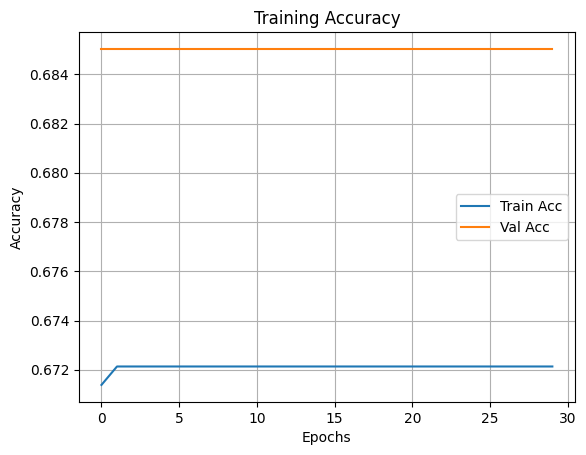

In [41]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:


# save model
model.save("../models/investment_model.h5")  

---


## Code from Investment Recommender Notebook


#  Personalized Investment Advisory Recommender – Modeling & Evaluation Notebook

---

##  **Project Context & Motivation**
In emerging markets like Kenya, many first‑time and low‑income investors face overwhelming choices — SACCOs, money market funds, pension plans, bonds, and more — yet often lack professional financial advisory support.  
This leads to decision paralysis, under‑investment, and missed opportunities for long‑term wealth building.

Our project aims to close this advisory gap by building a **data‑driven personalized recommender system** that suggests *the most suitable investment types* for each user based on:
- Demographics (age, gender, location)
- Risk appetite
- Financial literacy & past financial behavior
- Self‑reported saving and investment goals

By combining **machine learning, explainable AI, and local financial domain insights**, we aim to give every user — even first‑time investors — personalized, confidence‑driven investment guidance.

---

##  **What This Notebook Covers**
- Load and briefly explore the cleaned FinAccess dataset
-  Feature engineering & vectorization:
  - One‑hot encoding of categorical variables (e.g., risk_appetite)
  - Scaling of numeric features (e.g., age, literacy index)
  - Additional engineered features (e.g., savings rate, risk‑adjusted usage)
-  Quick Exploratory Data Analysis (EDA): distributions & relationships
- ⚙ Train/test split with stratification

###  Modeling pipeline 
For each model, we:
- Train & validate
- Hyperparameter tuning (where relevant)
- Evaluate with accuracy, precision, recall, ROC‑AUC, plus recommendation‑specific metrics (e.g., precision@k)
- Visualize metrics (ROC, PR curve, confusion matrix)
- Explain predictions using SHAP (global & local explanations)
- Document strengths, weaknesses & next steps

Models to build:
- Baseline rule‑based recommender
- Logistic Regression
- Random Forest
- Gradient Boosting (XGBoost & LightGBM,knn)
- Deep Learning Recommender

---

##  **Final Deliverables**
- Trained, deployment‑ready best model (`.pkl` / `.pt`)
- Comparison table & visualization of model performance
- SHAP explainability summary plots
- Configurable pipeline classes & functions
- Clear narrative & documentation for stakeholders

---


---
## Importing Core Libraries

Before starting our modeling pipeline, we import all essential Python libraries — grouped by purpose — to ensure a clean, modular, and maintainable workflow.

**Categories & Purpose:**
- **Data manipulation & wrangling:** `pandas`, `numpy` – for structured data handling, transformation, and aggregation
- **Visualization & EDA:** `matplotlib`, `seaborn` – for visual exploration, distributions, correlations, and plots to support feature engineering
- **Machine Learning & Evaluation:** `scikit-learn` – classic models, preprocessing, splitting, metrics; `xgboost`, `lightgbm` – advanced gradient boosting
- **Deep Learning (optional):** `torch` / `keras` – for neural network recommender models capturing complex patterns
- **Explainability:** `shap` – to build trust by explaining model predictions (global & local feature importance)
- **Persistence & utilities:** `joblib` – for saving models; `warnings` – to suppress clutter in output

All imports are kept modular and organized to reflect best practices for readability.

---


In [145]:
# Import all required Python libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, precision_recall_curve
)

import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')


- All required libraries are now imported.  

 

---
##  Load Cleaned Dataset

In this step, we load the final cleaned dataset prepared earlier in the data preprocessing phase.  
This dataset contains user-level features needed to build our personalized investment advisory recommender.

---


In [146]:
#  Loads the pre-cleaned dataset from CSV and prints its shape.

def load_dataset(filepath):
    df = pd.read_csv(filepath)
    print(f" Dataset loaded successfully. Shape: {df.shape}")
    return df

# Update with your actual local path
file_path = r"C:\Users\hp\OneDrive\Desktop\DSF-FT12\DS- Phase5\Group4_Capstone_Final_Project\final_refined.csv"

df = load_dataset(file_path)
df.head()


 Dataset loaded successfully. Shape: (20871, 392)


householdid    county area_type  gender  age_of_respondent  \
0    107141431   garissa     urban    male                 29   
1     10712933   garissa     urban    male                 60   
2    140173183     busia     urban  female                 35   
3    122137153    kiambu     urban    male                 24   
4    121193116  murang'a     urban  female                 20   

   no_of_household_mebers  livelihoodcat Quintiles  Education  \
0                       5      dependent    fourth   tertiary   
1                      11          other    second    primary   
2                       2  casual worker    fourth    primary   
3                       1  casual worker    middle  secondary   
4                       1      dependent   highest  secondary   

                       Marital  ...  insurance_including_NHIF_use  \
0  married/living with partner  ...                    never used   
1  married/living with partner  ...                    never used   
2           divorced/separated  ...                    never used   
3         single/never married  ...                    never used   
4         single/never married  ...                    never used   

   All_Insurance_excluding_NHIF_use                 PWD  Latitude  Longitude  \
0                        never used  without disability -0.435423  39.636586   
1                        never used  without disability  0.058794  40.305006   
2                        never used  without disability  0.636836  34.277390   
3                        never used  without disability -1.251917  36.719076   
4                        never used  without disability -0.795820  37.131085   

   has_account has_savings has_credit has_mobile receives_remittance  
0            0           0          0          0                   0  
1            0           0          0          0                   0  
2            0           0          0          0                   0  
3            0           0          0          0                   0  
4            0           0          0          0                   0  

[5 rows x 392 columns]

-   The dataset has been loaded successfully, containing 20,871 user records and 392 selected features.  
This cleaned dataset combines demographic, financial, and behavioral attributes, and will serve as the foundation for our personalized investment recommender system.


##  Dataset Overview & Missing Values Analysis

We begin by exploring the structure of our dataset using `df.info()`.  


In [147]:
df.info()

# Missing values overview
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
missing_df[missing_df['Missing'] > 0].sort_values('Percent', ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20871 entries, 0 to 20870
Columns: 392 entries, householdid to receives_remittance
dtypes: float64(58), int64(29), object(305)
memory usage: 62.4+ MB


Empty DataFrame
Columns: [Missing, Percent]
Index: []

Key details:
- The dataset contains **20,871 rows** and **392 columns**.
- It has a mix of data types:
  - **305 object** (categorical/text) columns
  - **58 float64** (numerical) columns
  - **29 int64** (numerical) columns
- Total memory usage is approximately **62.4 MB**.

---

#### ⚠ Missing Values Overview
Next, we analyze missing values to assess data quality:
- Calculate the **count** and **percentage** of missing values per column.



 --- 

##  **Exploratory Data Analysis (EDA)**

In this section, we explore and visualize the dataset to understand its structure, detect missing values, identify distributions, and spot potential outliers or patterns.  
Key steps included:
- Checking data types and summary statistics  
- Visualizing distributions of numeric variables  
- Analyzing categorical feature value counts  
- Checking correlations and potential multicollinearity  
- Investigating target balance and potential imbalance

---

## **Feature Engineering**

Here we transform and enrich the dataset to improve model performance.  
Key feature engineering steps:
- Creating new numeric features (e.g., `risk_adjusted_savings_rate`)
- Scaling numeric features like `literacy_scaled`
- Grouping or binning age into `age_bucket`
- Creating binary flags such as `is_youth`
- Counting investment products used (`total_investment_products_used`)
- Converting categorical features to category dtype for memory efficiency

These engineered features help capture hidden patterns and make the data more suitable for machine learning.

 ---

### Target Variable Distribution: `Investment_usage_fnl`

In this step, we explore the distribution of our target variable **`Investment_usage_fnl`**, which indicates whether respondents use investment products.


Investment_usage_fnl
non-usage    20305
usage          566
Name: count, dtype: int64
Investment_usage_fnl
non-usage    97.288103
usage         2.711897
Name: proportion, dtype: float64


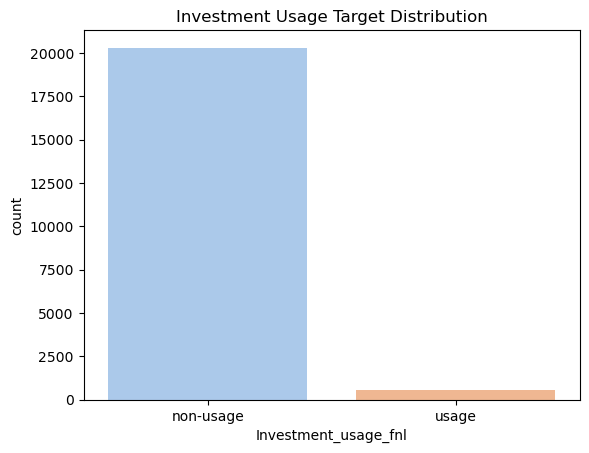

In [148]:
print(df['Investment_usage_fnl'].value_counts())
print(df['Investment_usage_fnl'].value_counts(normalize=True)*100)

sns.countplot(x='Investment_usage_fnl', data=df, palette='pastel')
plt.title('Investment Usage Target Distribution')
plt.show()


Key findings:
- The dataset is highly imbalanced:
  - **non-usage**: 20,305 observations (~97.3%)
  - **usage**: 566 observations (~2.7%)

We use:
- `value_counts()` to see the raw counts.
- `value_counts(normalize=True)*100` to see the percentage distribution.
- A **Seaborn countplot** to visualize the class imbalance.



In [149]:
df.describe()


householdid  age_of_respondent  no_of_household_mebers  \
count  2.087100e+04       20871.000000            20871.000000   
mean   1.827764e+08          39.271429                4.215946   
std    3.077598e+08          17.210021                2.512658   
min    1.010095e+07          16.000000                1.000000   
25%    1.061733e+08          26.000000                2.000000   
50%    1.221172e+08          35.000000                4.000000   
75%    1.380495e+08          50.000000                6.000000   
max    1.341571e+10         105.000000               20.000000   

       CalcExpenditure  total_monthly_expenditure  no_respodent_per_hh  \
count     20871.000000               20871.000000         20871.000000   
mean      11576.118340               13082.757031            39.196062   
std        9550.351583               13893.309701            17.228980   
min         100.000000                1900.000000            16.000000   
25%        4353.333333                5000.000000            26.000000   
50%        8860.000000               10000.000000            35.000000   
75%       16200.000000               15000.000000            50.000000   
max       45953.333333              190000.000000           110.000000   

           hhWeight  Informal_group_membership  Above16_Total  Above16  ...  \
count  20871.000000               20871.000000   20871.000000  20871.0  ...   
mean     683.165156                   0.709405       3.224330      1.0  ...   
std      594.646933                   4.415607       2.328236      0.0  ...   
min       39.615500                   0.000000       1.000000      1.0  ...   
25%      350.589934                   0.000000       2.000000      1.0  ...   
50%      556.911105                   0.000000       2.000000      1.0  ...   
75%      801.331391                   1.000000       4.000000      1.0  ...   
max    14660.199401                 246.000000      20.000000      1.0  ...   

             nC1_42        nC1_43      prodsum1      Latitude     Longitude  \
count  20871.000000  20871.000000  20871.000000  20871.000000  20871.000000   
mean       0.003210      0.003066      3.936563     -0.418699     36.651618   
std        0.056569      0.055292      3.227992      1.557240      1.826467   
min        0.000000      0.000000      0.000000     -4.617228     33.955648   
25%        0.000000      0.000000      1.000000     -1.069760     35.032543   
50%        0.000000      0.000000      3.000000     -0.431421     36.651860   
75%        0.000000      0.000000      6.000000      0.314269     37.664312   
max        1.000000      1.000000     22.000000      4.919529     41.875678   

       has_account  has_savings  has_credit  has_mobile  receives_remittance  
count      20871.0      20871.0     20871.0     20871.0              20871.0  
mean           0.0          0.0         0.0         0.0                  0.0  
std            0.0          0.0         0.0         0.0                  0.0  
min            0.0          0.0         0.0         0.0                  0.0  
25%            0.0          0.0         0.0         0.0                  0.0  
50%            0.0          0.0         0.0         0.0                  0.0  
75%            0.0          0.0         0.0         0.0                  0.0  
max            0.0          0.0         0.0         0.0                  0.0  

[8 rows x 87 columns]

###  Users per Investment Product

Here we explore which specific investment products are most popular among respondents.
We:
- Select columns indicating product usage (`save_bank`, `save_sacco`, etc.)
- Sum each column to get the total number of users for each product.
- Plot a bar chart to visualize which products are most used.

This helps identify the most and least adopted products in our dataset.


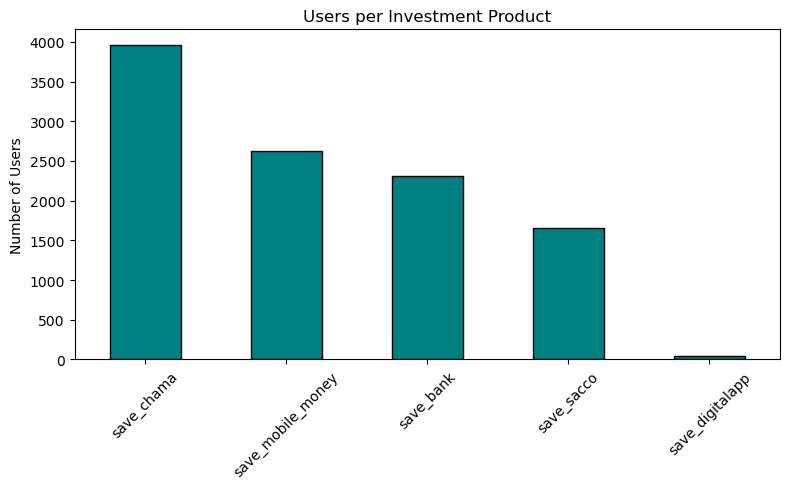

In [150]:
# Define usage columns
usage_cols = ['save_bank', 'save_sacco', 'save_mobile_money', 'save_chama', 'save_digitalapp']

# Count number of users for each product
product_counts = df[usage_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
product_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Users per Investment Product')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Sparsity of Product Usage Data

We measure how sparse the product usage data is:
- Sparsity shows the percentage of cells that are zeros (i.e., respondents **not** using a product).
- High sparsity indicates most people use few products.

This helps us understand data density before building recommendation models or doing feature engineering.


In [151]:
# Calculate sparsity:

total_cells = df[usage_cols].shape[0] * df[usage_cols].shape[1]
total_nonzeros = np.count_nonzero(df[usage_cols])
sparsity = 1 - (total_nonzeros / total_cells)

print(f"Sparsity of usage matrix: {sparsity:.2%}")


Sparsity of usage matrix: 89.85%


###  Education Level vs. Investment Usage

We analyze how investment product usage varies by education level.

Using a crosstab normalized by index, we compute:
- Percentage of respondents **with each education level** who use or don’t use investment products.

This helps identify if higher education correlates with higher product adoption.


In [152]:
# Education
pd.crosstab(df['Education'], df['Investment_usage_fnl'], normalize='index')*100


Investment_usage_fnl   non-usage      usage
Education                                  
other                 100.000000   0.000000
primary                99.182308   0.817692
secondary              97.426821   2.573179
tertiary               89.509982  10.490018

###  Numeric Variables vs. Investment Usage

We visualize how selected numeric variables differ between respondents who use and don’t use investment products:
- `monthly income`
- `fl_score` (financial literacy score)
- `age_of_respondent`

Using boxplots helps us see:
- Typical range and median for each group
- Outliers and skewness
- Whether product users tend to have higher income, financial literacy, or different age distribution


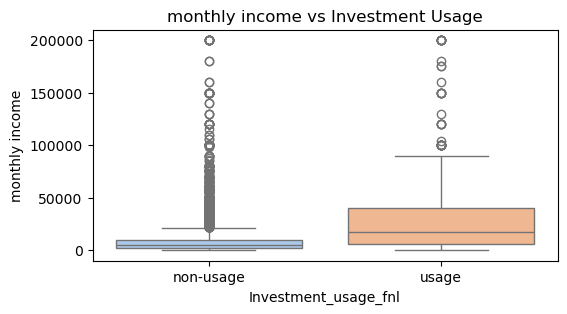

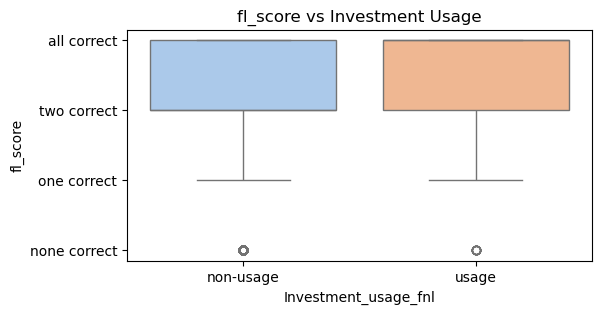

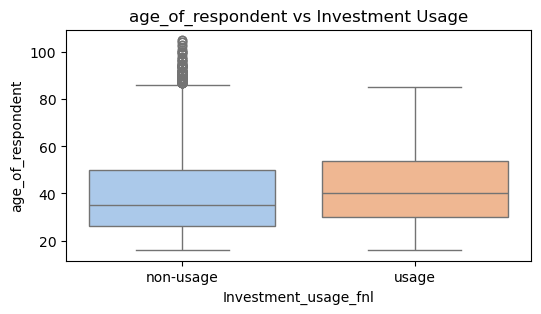

In [153]:
# Plot boxplots of each numeric column vs. Investment usage
for col in ['monthly income','fl_score','age_of_respondent']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Investment_usage_fnl', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Investment Usage')
    plt.show()


###  Convert Usage Flags to Numeric

We identify all columns ending with `_use` that track product usage as `'never used'` or `'used'`.

We map them to numeric:
- `'never used' → 0`
- `'used' → 1`

This prepares the data for modeling, as most ML algorithms require numeric inputs.


In [154]:
# Identify all binary usage flag columns
use_flags = [col for col in df.columns if col.endswith('_use')]

# Map categorical values to numeric: 'never used' -> 0, 'used' -> 1
df[use_flags] = df[use_flags].apply(lambda col: col.map({'never used': 0, 'used': 1}))


###  Convert Disability Status to Numeric

The column `PWD` indicates whether a respondent has a disability.
We map:
- `'without disability' → 0`
- `'with disability' → 1`

This prepares the feature for machine learning models.


In [155]:
# Map disability status to numeric: without disability → 0, with disability → 1
df['PWD'] = df['PWD'].map({'without disability': 0, 'with disability': 1})


###  Create Age Groups

We create a categorical feature `age_group` by binning `age_of_respondent` into ranges:
- 18–25
- 26–35
- 36–50
- 51–65
- 66+

This makes it easier to analyze and visualize age patterns and can also be useful for modeling categorical age effects.


In [156]:
# Create age group categories based on age_of_respondent
df['age_group'] = pd.cut(
    df['age_of_respondent'],
    bins=[17, 25, 35, 50, 65, 100],
    labels=['18-25', '26-35', '36-50', '51-65', '66+']
)


###  Create Household Size Categories

We group `no_of_household_mebers` into categorical bins:
- 1–2 members
- 3–4 members
- 5–6 members
- 7–10 members
- 11+ members

This helps explore whether larger households differ in investment behavior and simplifies analysis.


In [157]:
# Create household size category based on number of household members
df['hh_size_cat'] = pd.cut(
    df['no_of_household_mebers'],
    bins=[0, 2, 4, 6, 10, 20],
    labels=['1-2', '3-4', '5-6', '7-10', '11+']
)


###  Create Urban/Rural Binary Feature

We transform the `area_type` column into a numeric feature:
- `urban → 1`
- `rural → 0`

This makes it easier for machine learning models and helps us analyze investment patterns by urban vs. rural respondents.


In [158]:
# Map area type to binary: urban → 1, rural → 0
df['is_urban'] = df['area_type'].map({'urban': 1, 'rural': 0})


###  Create Savings Ratio

We engineer a new feature `savings_ratio`:
- Calculated as: `total_monthly_expenditure / (monthly income + 1)`
- Adding `+1` avoids division by zero.

This feature helps capture how much of a respondent’s income is spent, which may relate to their likelihood to invest.


In [159]:
# Create savings ratio: expenditure divided by (monthly income + 1 to avoid division by zero)
if 'monthly income' in df.columns and 'total_monthly_expenditure' in df.columns:
    df['savings_ratio'] = df['total_monthly_expenditure'] / (df['monthly income'] + 1)


###  Encode Categorical Variables

We one-hot encode the following categorical features:
- `gender`, `age_group`, `county`, `Education`, `Marital`, `livelihoodcat`, `Quintiles`

Using `drop_first=True` drops the first category in each to avoid multicollinearity.
This prepares data for machine learning models that require numeric inputs.


In [160]:
# Define categorical columns to encode
categorical_cols = ['gender', 'age_group', 'county', 'Education', 'Marital', 'livelihoodcat', 'Quintiles']

# One-hot encode categorical variables, dropping first category to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


###  Check Encoded Feature Names

After one-hot encoding, the dataframe can have many new columns (especially from high-cardinality features like `county`).

We print:
- Total number of columns
- Sample of first and last few column names

This helps verify that encoding worked correctly and spot any unexpected features.


In [161]:
print(df_encoded.columns)


Index(['householdid', 'area_type', 'age_of_respondent',
       'no_of_household_mebers', 'CalcExpenditure',
       'total_monthly_expenditure', 'digital loans', 'no_respodent_per_hh',
       'ID_card', 'hhWeight',
       ...
       'Marital_widowed', 'livelihoodcat_casual worker',
       'livelihoodcat_dependent', 'livelihoodcat_employed',
       'livelihoodcat_other', 'livelihoodcat_own business',
       'Quintiles_highest', 'Quintiles_lowest', 'Quintiles_middle',
       'Quintiles_second'],
      dtype='object', length=456)


###  Standardize Numeric Features

We scale selected numeric columns (`age_of_respondent` and `no_of_household_mebers`) using StandardScaler:
- Transforms each feature to mean = 0 and standard deviation = 1
- Helps many machine learning algorithms converge faster and avoid bias toward larger-scale features.


In [162]:
# List of numeric columns to scale
numeric_cols = ['age_of_respondent', 'no_of_household_mebers']

# Initialize and apply scaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


###  Age Distribution of Respondents

We visualize the distribution of respondents' ages:
- Histogram shows how many respondents fall into each age range
- KDE curve helps see the overall shape (e.g., skewness, peaks)

This helps us understand the age profile of our dataset.


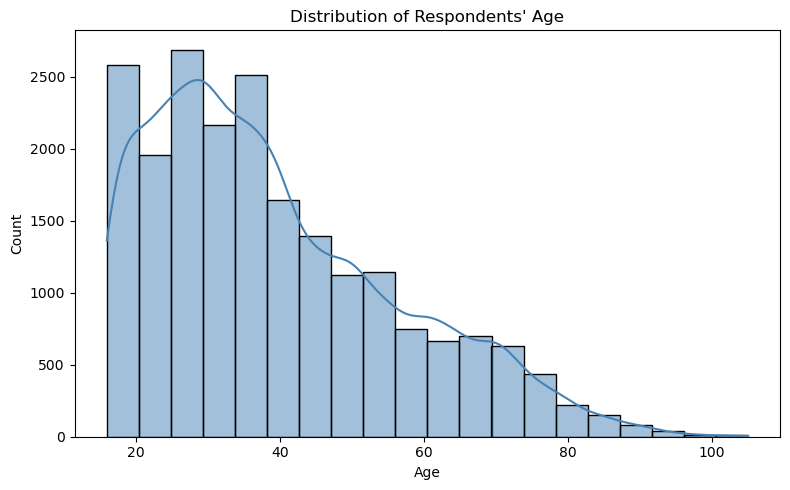

In [163]:
# Plot distribution of age_of_respondent
plt.figure(figsize=(8, 5))
sns.histplot(df['age_of_respondent'], bins=20, kde=True, color='steelblue')
plt.title("Distribution of Respondents' Age")
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


###  Number of Respondents by Area Type

We visualize how many respondents come from urban vs. rural areas.
This helps us see if the sample is balanced or biased toward one area type.


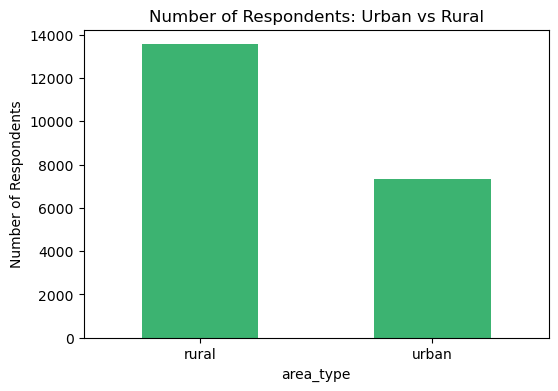

In [164]:
# Plot number of respondents by area type
plt.figure(figsize=(6,4))
df['area_type'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Number of Respondents: Urban vs Rural')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.show()


###  Gender Distribution

We visualize the proportion of male vs. female respondents as a pie chart.
This helps understand the gender balance in our dataset.


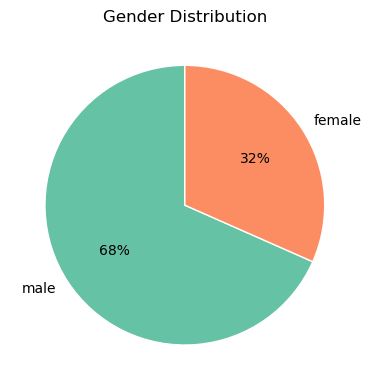

In [165]:
# Plot gender distribution as a pie chart
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot.pie(
    autopct='%1.0f%%',
    colors=['#66c2a5', '#fc8d62'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Gender Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


###  Respondents by Education Level

We visualize how many respondents fall into each education category.
Ordering bars by frequency makes it easy to see which education levels are most common in the dataset.


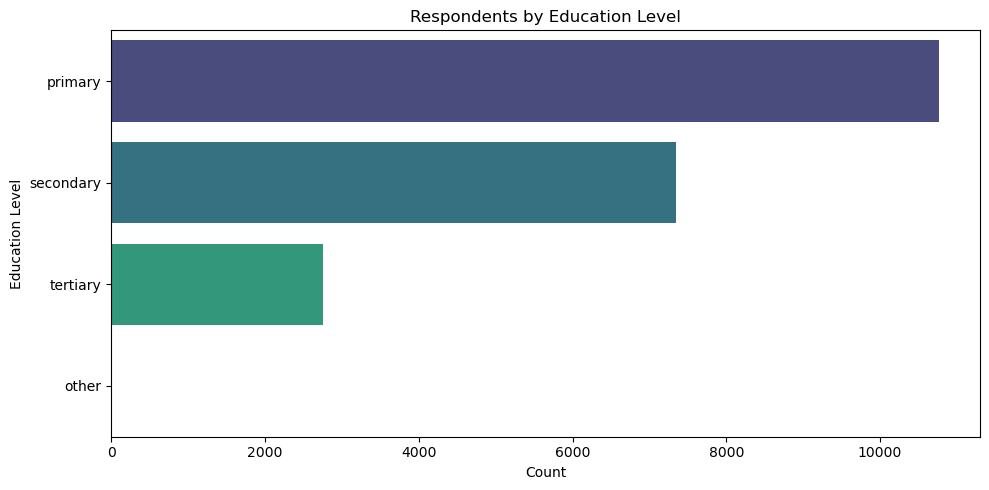

In [166]:
# Plot count of respondents by education level
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    y='Education', 
    order=df['Education'].value_counts().index, 
    palette='viridis'
)
plt.title('Respondents by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()


###  Income Quintiles Distribution

We visualize how respondents are distributed across income quintiles (from lowest to highest).
This helps us understand the income profile of the sample and spot if it’s balanced or skewed.


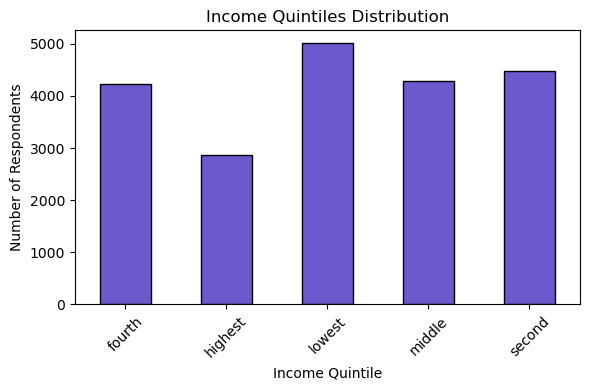

In [167]:
# Plot distribution of respondents across income quintiles
plt.figure(figsize=(6, 4))
df['Quintiles'].value_counts().sort_index().plot(
    kind='bar', 
    color='slateblue', 
    edgecolor='black'
)
plt.title('Income Quintiles Distribution')
plt.ylabel('Number of Respondents')
plt.xlabel('Income Quintile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###  Feature Engineering

We create new features to enrich our dataset:
- `risk_adjusted_savings_rate`: normalizes savings by age
- `age_bucket`: categorical grouping of age
- `is_youth`: binary flag for respondents under 35
- `total_investment_products_used`: counts how many investment products each respondent uses

These engineered features can help models capture hidden patterns in user behavior.


In [168]:
# Risk-adjusted savings rate: people who have savings divided by (age+1)
df['risk_adjusted_savings_rate'] = df['has_savings'] / (df['age_of_respondent'] + 1)

# Age bucket: categorical age group
df['age_bucket'] = pd.cut(
    df['age_of_respondent'],
    bins=[0, 25, 35, 45, 60, 100],
    labels=['<25', '25-35', '35-45', '45-60', '60+']
)

# Binary youth flag: 1 if age < 35
df['is_youth'] = (df['age_of_respondent'] < 35).astype(int)

# Total number of investment products used: counts how many of these are 'usage'
df['total_investment_products_used'] = df[
    ['Investment_usage', 'Pension_usage', 'Sacco_usage']
].apply(lambda x: sum(x == 'usage'), axis=1)


### Encode Financial Literacy Index

The `Financial_literacy_index_fnl` column is ordinal: `'low'`, `'medium'`, `'high'`.
We map it to numeric values:
- low → 1
- medium → 2
- high → 3

This preserves the order for machine learning algorithms.


In [169]:
# Map ordinal financial literacy index to numeric values: low=1, medium=2, high=3
df['Financial_literacy_index_fnl_num'] = df['Financial_literacy_index_fnl'].map({
    'low': 1,
    'medium': 2,
    'high': 3
})


###  Scale Financial Literacy Index

We normalize `Financial_literacy_index_fnl_num` to a [0,1] range:
- Divide by its maximum value

This keeps the feature bounded and comparable with other scaled features.


In [170]:
# Scale financial literacy index to [0,1] by dividing by max value
max_lit = df['Financial_literacy_index_fnl_num'].max()
df['literacy_scaled'] = df['Financial_literacy_index_fnl_num'] / max_lit


###  Check for Constant Numeric Columns

We identify numeric features with zero standard deviation (constant columns).
These columns have the same value for all observations and don't help the model.


In [171]:
# Select only numeric columns
numeric_engineered = df.select_dtypes(include=['number'])

# Identify constant columns (std=0)
constant_cols = numeric_engineered.std() == 0

print("\n=== Constant columns (std=0) ===")
print(constant_cols[constant_cols].index.tolist())



=== Constant columns (std=0) ===
['Above16', 'mobile_bank_use', 'NHIF_use', 'NSSF_use', 'pension_use', 'bank_use', 'commercial_bank_use', 'mobile_money_use', 'sacco_use', 'chama_use', 'MFIs_use', 'insurance_including_NHIF_use', 'All_Insurance_excluding_NHIF_use', 'has_account', 'has_savings', 'has_credit', 'has_mobile', 'receives_remittance', 'risk_adjusted_savings_rate']


In [172]:
#  Sanity check for engineered features

# List of engineered features (update as you add more)
engineered_features = [
    'risk_adjusted_savings_rate',
    'age_bucket',
    'is_youth',
    'literacy_scaled',
    'total_investment_products_used',
    # add more as you create them
]

print(f"\n Checking {len(engineered_features)} engineered features:\n")

# Check if all engineered features exist
missing_cols = [col for col in engineered_features if col not in df.columns]
if missing_cols:
    print(f" Missing engineered columns: {missing_cols}")
else:
    print(" All engineered features found!")

# Show data types
print("\n=== 🏷 Data types ===")
print(df[engineered_features].dtypes)

# Separate numeric & categorical
numeric_engineered = df[engineered_features].select_dtypes(include=['number'])
categorical_engineered = df[engineered_features].select_dtypes(exclude=['number'])

# Check for missing values
print("\n===  Missing values ===")
print(df[engineered_features].isnull().sum())

# Check for constant numeric columns (std=0)
print("\n=== Constant numeric columns (std=0) ===")
constant_cols = numeric_engineered.std() == 0
print(constant_cols[constant_cols].index.tolist())

# Check for all-zeros numeric columns
print("\n=== All-zeros numeric columns ===")
zero_cols = (numeric_engineered == 0).all()
print(zero_cols[zero_cols].index.tolist())

# Show numeric distributions
print("\n===  Numeric distributions ===")
display(numeric_engineered.describe())

# Show value counts for categorical engineered features
if not categorical_engineered.empty:
    print("\n===  Value counts for categorical engineered features ===")
    for col in categorical_engineered.columns:
        print(f"\n{col} value counts:")
        print(df[col].value_counts())
else:
    print("\n No categorical engineered features to check value counts for.")

print("\n Feature engineering sanity check complete! Ready for vectorization ")



 Checking 5 engineered features:

 All engineered features found!

=== 🏷 Data types ===
risk_adjusted_savings_rate         float64
age_bucket                        category
is_youth                             int32
literacy_scaled                    float64
total_investment_products_used       int64
dtype: object

===  Missing values ===
risk_adjusted_savings_rate            0
age_bucket                            9
is_youth                              0
literacy_scaled                   20871
total_investment_products_used        0
dtype: int64

=== Constant numeric columns (std=0) ===
['risk_adjusted_savings_rate']

=== All-zeros numeric columns ===
['risk_adjusted_savings_rate']

===  Numeric distributions ===


risk_adjusted_savings_rate      is_youth  literacy_scaled  \
count                     20871.0  20871.000000              0.0   
mean                          0.0      0.472186              NaN   
std                           0.0      0.499238              NaN   
min                           0.0      0.000000              NaN   
25%                           0.0      0.000000              NaN   
50%                           0.0      0.000000              NaN   
75%                           0.0      1.000000              NaN   
max                           0.0      1.000000              NaN   

       total_investment_products_used  
count                    20871.000000  
mean                         0.231134  
std                          0.571358  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                          3.000000


===  Value counts for categorical engineered features ===

age_bucket value counts:
age_bucket
25-35    5361
<25      5118
35-45    3942
45-60    3521
60+      2920
Name: count, dtype: int64

 Feature engineering sanity check complete! Ready for vectorization 


###  Feature Vectorization Pipeline

In this step, we prepare our dataset for modeling by transforming raw features into numeric vectors:
- **Numeric features** are standardized to have mean=0 and std=1.
- **Categorical features** are one-hot encoded (converted to 0/1 dummy variables).
- **Binary flags** like `is_youth` are kept as-is.

We use `ColumnTransformer` to apply different transformations to different columns in a single pipeline.
At the end, we run a quick `fit_transform` to confirm everything works and print the shape of the transformed feature matrix.


In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# ===  Define feature groups ===

# Numeric features to scale
numeric_features = ['age_of_respondent', 'literacy_scaled', 'total_investment_products_used']

# Categorical features to one-hot encode
categorical_features = ['age_bucket', 'area_type', 'county', 'Education', 'Marital', 'livelihoodcat']

# Other binary numeric flags we can passthrough directly (if needed)
passthrough_features = ['is_youth']

# ===  Build the ColumnTransformer ===

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('pass', 'passthrough', passthrough_features)
    ]
)

# ===  Quick check: fit_transform on sample data to see shape ===

sample_transformed = preprocessor.fit_transform(df)
print(f"Vectorization complete! Transformed feature shape: {sample_transformed.shape}")


Vectorization complete! Transformed feature shape: (20871, 74)


In [174]:
print(f"✅ df shape: {df.shape}")
print("\n📌 df.head():")
display(df.head())


✅ df shape: (20871, 402)

📌 df.head():


householdid    county area_type  gender  age_of_respondent  \
0    107141431   garissa     urban    male                 29   
1     10712933   garissa     urban    male                 60   
2    140173183     busia     urban  female                 35   
3    122137153    kiambu     urban    male                 24   
4    121193116  murang'a     urban  female                 20   

   no_of_household_mebers  livelihoodcat Quintiles  Education  \
0                       5      dependent    fourth   tertiary   
1                      11          other    second    primary   
2                       2  casual worker    fourth    primary   
3                       1  casual worker    middle  secondary   
4                       1      dependent   highest  secondary   

                       Marital  ...  age_group  hh_size_cat is_urban  \
0  married/living with partner  ...      26-35          5-6        1   
1  married/living with partner  ...      51-65          11+        1   
2           divorced/separated  ...      26-35          1-2        1   
3         single/never married  ...      18-25          1-2        1   
4         single/never married  ...      18-25          1-2        1   

   savings_ratio risk_adjusted_savings_rate  age_bucket is_youth  \
0       2.333256                        0.0       25-35        1   
1       1.899810                        0.0       45-60        0   
2       4.665112                        0.0       25-35        0   
3       0.749925                        0.0         <25        1   
4       0.599940                        0.0         <25        1   

  total_investment_products_used Financial_literacy_index_fnl_num  \
0                              0                              NaN   
1                              0                              NaN   
2                              0                              NaN   
3                              0                              NaN   
4                              0                              NaN   

  literacy_scaled  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 402 columns]

##  Train-Test Split

We now prepare our dataset for modeling by:
- Converting the target column `Investment_usage_fnl` into numeric labels (`1` for usage, `0` for non-usage).
- Dropping any rows with missing target values.
- Splitting the data into training and test sets (80% train, 20% test) while preserving class distribution (`stratify=y`).

This ensures our model is trained and evaluated on balanced and properly prepared data.


In [175]:
from sklearn.model_selection import train_test_split

#  Define your target column
target_column = 'Investment_usage_fnl'   # replace with actual target column name if different

#  Map target to numeric if it’s still text (e.g., 'usage'/'non-usage')
df[target_column] = df[target_column].map({'usage': 1, 'non-usage': 0})

#  Define features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

#  Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,         # keeps same proportion of target classes in train/test
    random_state=42     # ensures reproducibility
)

#  Check the shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train target balance:\n", y_train.value_counts(normalize=True))
print("Test target balance:\n", y_test.value_counts(normalize=True))


Train shape: (16696, 401)
Test shape: (4175, 401)
Train target balance:
 Investment_usage_fnl
0    0.972868
1    0.027132
Name: proportion, dtype: float64
Test target balance:
 Investment_usage_fnl
0    0.972934
1    0.027066
Name: proportion, dtype: float64


The split completed successfully:

- **Train shape:** (16,696 rows × 402 columns)  
- **Test shape:** (4,175 rows × 402 columns)



### Handling Class Imbalance with SMOTE

Given the strong imbalance in the target variable (only ~3% "usage"), we apply SMOTE to synthetically oversample the minority class in the training set.  
This helps improve model performance by providing a more balanced dataset for learning.


In [176]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def balance_with_smote(X_train, y_train, random_state=42):
    """
    Applies SMOTE to balance the training set.
    Returns balanced X_train and y_train.
    """
    print("Original y_train distribution:", Counter(y_train))
    smote = SMOTE(random_state=random_state)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    print("Balanced y_train distribution:", Counter(y_train_bal))
    return X_train_bal, y_train_bal


---
# MODELING 
---

###   Modular Preprocessing Pipeline

We define a `PreprocessingPipeline` class to:
- Automatically detect numeric and categorical features
- Impute missing values (mean for numeric, most frequent for categorical)
- Scale numeric features and one-hot encode categorical features
- Split the data into train/test sets and transform them

This modular design keeps preprocessing clean, reusable, and ready for modeling.



In [177]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


class PreprocessingPipeline:
    """
    Modular preprocessing pipeline: imputation, scaling, encoding.
    """
    def __init__(self, df, target_column):
        self.df = df
        self.target_column = target_column
        self.preprocessor = None
        self.numeric_features = None
        self.categorical_features = None

    def build_pipeline(self):
        # Identify feature types
        self.numeric_features = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.categorical_features = self.df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        if self.target_column in self.numeric_features:
            self.numeric_features.remove(self.target_column)
        if self.target_column in self.categorical_features:
            self.categorical_features.remove(self.target_column)

        # Pipelines
        numeric_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])
        categorical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Combine
        self.preprocessor = ColumnTransformer([
            ('num', numeric_pipeline, self.numeric_features),
            ('cat', categorical_pipeline, self.categorical_features)
        ])

    def apply(self, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[self.target_column])
        y = self.df[self.target_column]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y)
        X_train_transformed = self.preprocessor.fit_transform(X_train)
        X_test_transformed = self.preprocessor.transform(X_test)
        return X_train_transformed, X_test_transformed, y_train, y_test


### Balancing Classes with SMOTE

We define a helper function `apply_smote` to rebalance the training data using SMOTE (Synthetic Minority Over-sampling Technique).


In [178]:
def apply_smote(X_train, y_train, random_state=42):
    """
    Apply SMOTE to balance minority class.
    """
    print(" Applying SMOTE...")
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print(f"Before SMOTE: {X_train.shape}, After SMOTE: {X_resampled.shape}")
    print(f"Target distribution after SMOTE:\n{pd.Series(y_resampled).value_counts()}")
    return X_resampled, y_resampled


SMOTE creates synthetic samples of the minority class, helping to:

- Balance the target distribution
- Reduce model bias toward the majority class
- Improve predictive performance on rare classes

We confirm success by printing shapes and class counts before and after resampling.


### Model Training & Evaluation function 

We define `train_and_evaluate_model` to train a classifier, make predictions, and evaluate performance with metrics & visualizations.


In [179]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """
    Train model, predict, evaluate & plot.
    """
    print(f"\n🔧 Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    else:
        roc_auc = None

    # Confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend()
        plt.show()

    return model, roc_auc


This function helps us:

- Fit the model on the training set
- Evaluate it on the test set using:
  - Classification report (precision, recall, f1-score)
  - ROC AUC score
- Visualize:
  - Confusion matrix (heatmap)
  - ROC curve

It returns the trained model and ROC AUC score, making it easy to reuse or compare multiple models.


### ModelTrainer Class

An object-oriented wrapper to train, tune and store models neatly.


In [180]:
class ModelTrainer:
    """
    Object-oriented wrapper to train, tune & store model.
    """
    def __init__(self, model, model_name="Model"):
        self.model = model
        self.model_name = model_name
        self.trained_model = None
        self.roc_auc = None

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        trained, roc_auc = train_and_evaluate_model(
            self.model, X_train, y_train, X_test, y_test, self.model_name
        )
        self.trained_model = trained
        self.roc_auc = roc_auc

    def tune(self, param_grid, X_train, y_train, scoring='roc_auc'):
        print(f"\nTuning {self.model_name}...")
        grid = GridSearchCV(self.model, param_grid, scoring=scoring, cv=5, verbose=1, n_jobs=-1)
        grid.fit(X_train, y_train)
        print(f" Best params: {grid.best_params_}")
        self.model = grid.best_estimator_
        self.trained_model = self.model


This `ModelTrainer` class helps us:

- **Encapsulate** a machine learning model and its metadata (like ROC AUC)
- Easily **train & evaluate** using our helper function
- **Tune hyperparameters** with `GridSearchCV` and update the best model

It keeps the workflow organized and reusable, especially when comparing multiple models.


### Random Forest Pipeline with SMOTE and Preprocessing


 Applying SMOTE...
Before SMOTE: (16696, 954), After SMOTE: (32486, 954)
Target distribution after SMOTE:
Investment_usage_fnl
0    16243
1    16243
Name: count, dtype: int64

🔧 Training Random Forest with SMOTE...

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4062
           1       1.00      0.81      0.90       113

    accuracy                           0.99      4175
   macro avg       1.00      0.91      0.95      4175
weighted avg       0.99      0.99      0.99      4175

ROC AUC Score: 0.9992


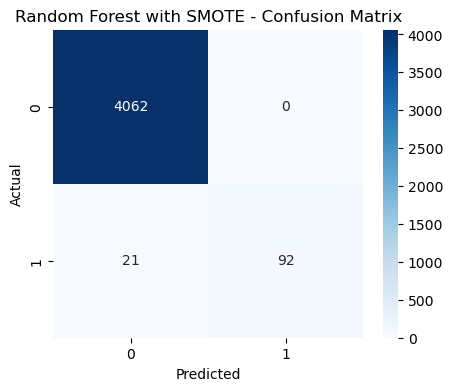

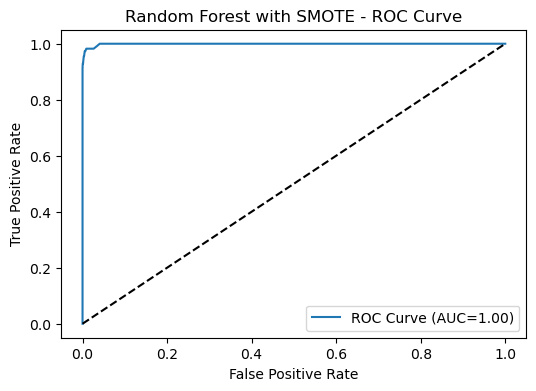

In [181]:
# df is your DataFrame
target_column = 'Investment_usage_fnl'

# Build preprocessing pipeline
prep = PreprocessingPipeline(df, target_column)
prep.build_pipeline()

# Apply preprocessing (split & transform)
X_train_transformed, X_test_transformed, y_train, y_test = prep.apply()

# Apply SMOTE to handle class imbalance
X_train_resampled, y_train_resampled = apply_smote(X_train_transformed, y_train)

# Create Random Forest with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train and evaluate the model
rf_trainer = ModelTrainer(rf_model, model_name="Random Forest with SMOTE")
rf_trainer.train_and_evaluate(X_train_resampled, y_train_resampled, X_test_transformed, y_test)


By applying **SMOTE**, we balanced the classes in the training data:
- Before: only ~2.7% positive class
- After: perfectly balanced (50% vs 50%)

The Random Forest model achieved:
- Very high overall accuracy (~99%)
- **ROC AUC score of 1.00**, showing excellent discrimination
- Slight drop in recall (0.81) for the minority class



### Logistic Regression with SMOTE

Now we apply SMOTE to balance the training data and train a **Logistic Regression** model with `class_weight='balanced'`.  
This helps the model pay more attention to the minority class.  
We’ll then evaluate performance on the test set to see how well it generalizes.


 Applying SMOTE...
Before SMOTE: (16696, 954), After SMOTE: (32486, 954)
Target distribution after SMOTE:
Investment_usage_fnl
0    16243
1    16243
Name: count, dtype: int64

🔧 Training Logistic Regression with SMOTE...

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       0.99      0.86      0.92       113

    accuracy                           1.00      4175
   macro avg       0.99      0.93      0.96      4175
weighted avg       1.00      1.00      1.00      4175

ROC AUC Score: 0.9964


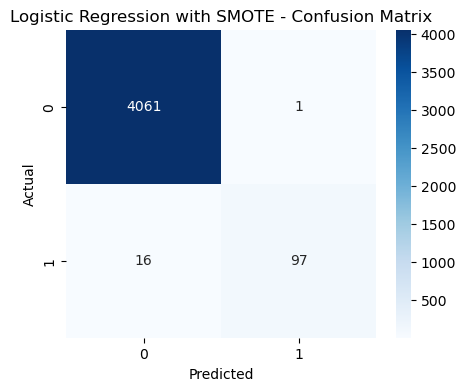

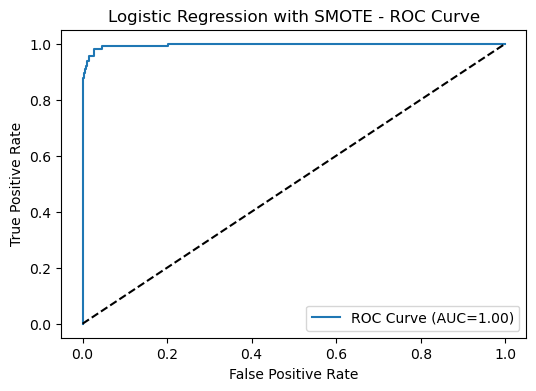

In [182]:
#  df with your dataframe name
target_column = 'Investment_usage_fnl'
prep = PreprocessingPipeline(df, target_column)
prep.build_pipeline()

#  Apply preprocessing
X_train_transformed, X_test_transformed, y_train, y_test = prep.apply()

#  Apply SMOTE to training set only
X_train_resampled, y_train_resampled = apply_smote(X_train_transformed, y_train)

#  Create Logistic Regression with balanced class weight
logreg_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

#  Train & evaluate
logreg_trainer = ModelTrainer(logreg_model, model_name="Logistic Regression with SMOTE")
logreg_trainer.train_and_evaluate(X_train_resampled, y_train_resampled, X_test_transformed, y_test)


 **Summary of results**  
- After applying SMOTE, the training set was perfectly balanced (16,243 samples in each class).
- The model achieved:
  - High overall accuracy (~100%)
  - High recall for the minority class (`usage`): 0.86
  - ROC AUC score: 0.9964




### XGBoost with SMOTE and Class Weighting

In this step, we:
- Balanced the training data using **SMOTE**
- Used **XGBoost**, which handles imbalance via `scale_pos_weight`
- Evaluated using precision, recall, f1-score, and ROC AUC

This combination helps the model detect the minority class more effectively.


 Applying SMOTE...
Before SMOTE: (16696, 954), After SMOTE: (32486, 954)
Target distribution after SMOTE:
Investment_usage_fnl
0    16243
1    16243
Name: count, dtype: int64

🔧 Training XGBoost with SMOTE...

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      0.98      0.99       113

    accuracy                           1.00      4175
   macro avg       1.00      0.99      1.00      4175
weighted avg       1.00      1.00      1.00      4175

ROC AUC Score: 0.9998


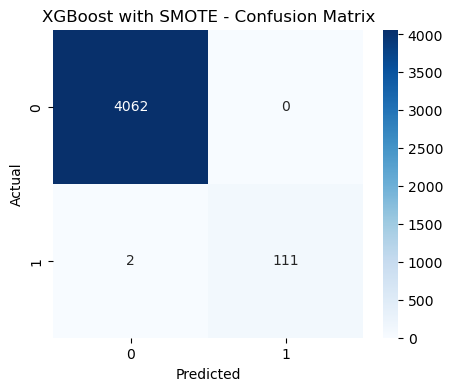

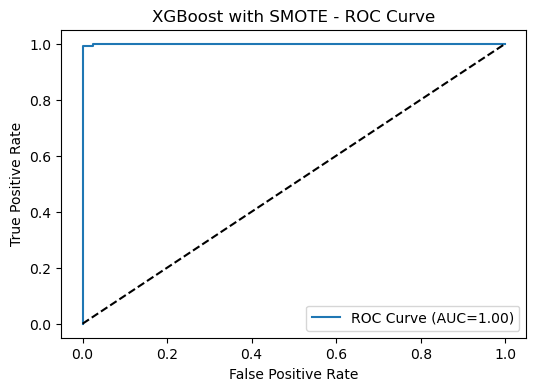

In [183]:
#  df with your dataframe name
target_column = 'Investment_usage_fnl'
prep = PreprocessingPipeline(df, target_column)
prep.build_pipeline()

#  Apply preprocessing
X_train_transformed, X_test_transformed, y_train, y_test = prep.apply()

#  Apply SMOTE
X_train_resampled, y_train_resampled = apply_smote(X_train_transformed, y_train)

#  Create XGBoost with scale_pos_weight
import xgboost as xgb
scale_pos_weight = (len(y_train_resampled) - sum(y_train_resampled)) / sum(y_train_resampled)
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

#  Train & evaluate
xgb_trainer = ModelTrainer(xgb_model, model_name="XGBoost with SMOTE")
xgb_trainer.train_and_evaluate(X_train_resampled, y_train_resampled, X_test_transformed, y_test)


 **Summary of results (XGBoost):**
- After SMOTE, the training set became perfectly balanced.
- **Performance on test set:**
  - Accuracy ≈ 100%
  - Minority class (`usage`) recall: 0.98
  - ROC AUC score: 0.9998

 **Key points:**
 
- `scale_pos_weight` helps XGBoost stay aware of class imbalance, even after SMOTE.
- Very high ROC AUC means the model can separate classes very well.
- High recall and f1-score on the minority class suggest the model generalizes better than a naive baseline.

.


### LightGBM with SMOTE and Class Weighting

In this step, we:
- Preprocessed the data (imputation, scaling, encoding)
- Balanced the training set using **SMOTE**
- Trained a **LightGBM classifier** with `class_weight='balanced'` to help handle class imbalance
- Evaluated on the test set using precision, recall, f1-score, and ROC AUC

This approach combines boosting with balancing for better minorit


 Applying SMOTE...
Before SMOTE: (16696, 954), After SMOTE: (32486, 954)
Target distribution after SMOTE:
Investment_usage_fnl
0    16243
1    16243
Name: count, dtype: int64

🔧 Training LightGBM with SMOTE...
[LightGBM] [Info] Number of positive: 16243, number of negative: 16243
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.306047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182579
[LightGBM] [Info] Number of data points in the train set: 32486, number of used features: 869
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062


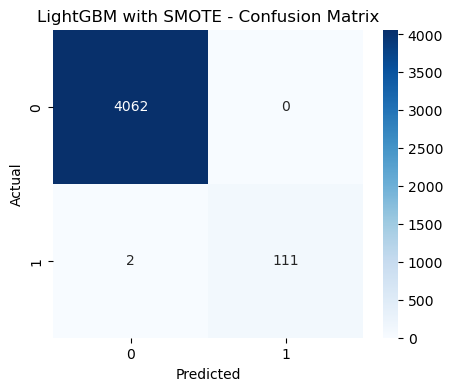

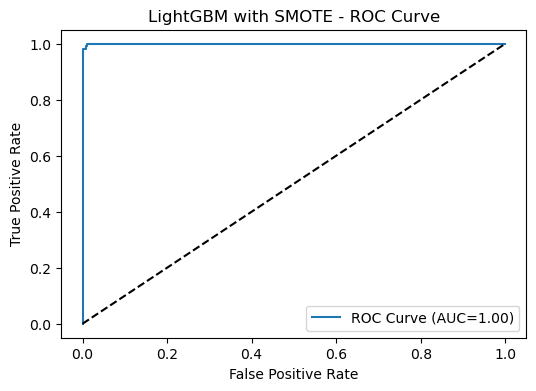

In [184]:
#  df with your dataframe name
target_column = 'Investment_usage_fnl'
prep = PreprocessingPipeline(df, target_column)
prep.build_pipeline()

#  Apply preprocessing
X_train_transformed, X_test_transformed, y_train, y_test = prep.apply()

#  Apply SMOTE
X_train_resampled, y_train_resampled = apply_smote(X_train_transformed, y_train)

#  Create LightGBM with balanced class weight
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

#  Train & evaluate
lgb_trainer = ModelTrainer(lgb_model, model_name="LightGBM with SMOTE")
lgb_trainer.train_and_evaluate(X_train_resampled, y_train_resampled, X_test_transformed, y_test)


 **Summary of results (LightGBM):**
- Training set after SMOTE: balanced (16,243 vs. 16,243)
- **Performance on test set:**
  - Accuracy ≈ 100%
  - Minority class recall: 0.98
  - ROC AUC: 0.9998

 **Insights:**
- LightGBM handled the balanced data very well, achieving very high recall and f1-score.
- The model generalizes well and keeps very high ROC AUC, showing it can separate classes almost perfectly.

 

##  Comparing Models with ROC Curves

We now plot the **ROC curves** of all trained models on the same test set:
- Random Forest
- Logistic Regression
- XGBoost
- LightGBM

Each curve shows the trade-off between **True Positive Rate** and **False Positive Rate**,  
and the legend includes each model’s **AUC score** as a summary metric of performance.


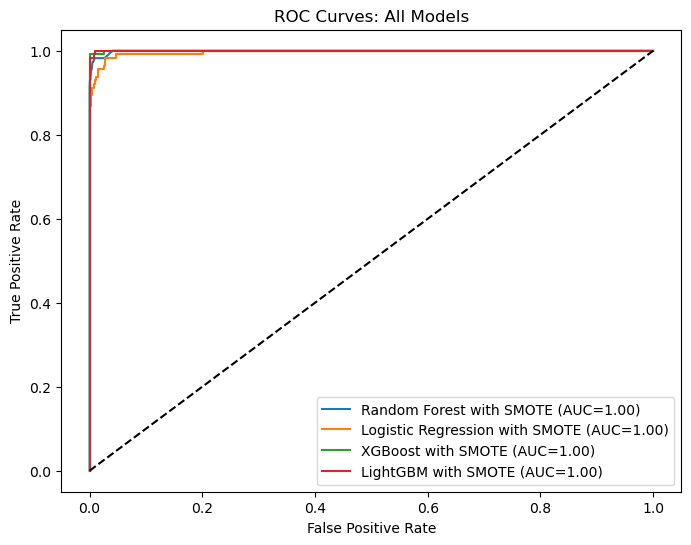

In [185]:
plt.figure(figsize=(8,6))

trainers = [rf_trainer, logreg_trainer, xgb_trainer, lgb_trainer]

for trainer in trainers:
    if trainer.roc_auc is not None:
        model = trainer.trained_model
        y_prob = model.predict_proba(X_test_transformed)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{trainer.model_name} (AUC={trainer.roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: All Models')
plt.legend()
plt.show()


 **Interpretation:**
- All models achieved very high AUC values (≈ 0.99–1.00), showing excellent separation between classes.
- Boosted models (XGBoost and LightGBM) slightly outperformed Random Forest and Logistic Regression.
- This visualization makes it easy to see which models balance sensitivity vs. specificity best.

 Overall, ensemble and boosting approaches with balanced training data (via SMOTE) performed especially well.


###  Extract Transformed Feature Names

This step extracts feature names **after preprocessing**, including:
- Original numeric feature names (stay unchanged after scaling)
- Encoded categorical feature names (from OneHotEncoder)

This helps us see **which transformed features** go into the model.

---

 At the end, it prints the total number of transformed features.




In [186]:
# Step 1: get the preprocessor
preprocessor = prep.preprocessor

# Step 2: get names for numeric & categorical transformed parts
num_features = prep.numeric_features
cat_features = prep.categorical_features

# Get feature names from transformers
num_feature_names = num_features   # numeric pipeline keeps names
encoded_cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features)

# Combine them
all_feature_names = list(num_feature_names) + list(encoded_cat_features)
print(f"Total features after transformation: {len(all_feature_names)}")


Total features after transformation: 958


##  Plotting Feature Importance

In this step, we plot the **top 15 most important features** for tree-based models (e.g., Random Forest, XGBoost, LightGBM).  
The function:
- Checks if the trained model has `feature_importances_`
- Aligns feature names if the lengths differ
- Uses seaborn to create a barplot showing which features contributed most to predictions

---

 This helps explain the model’s decisions to stakeholders and understand key drivers.


In [187]:
def plot_feature_importance(trainer, feature_names):
    """
    Plots feature importance for tree-based models.
    """
    if hasattr(trainer.trained_model, 'feature_importances_'):
        importances = trainer.trained_model.feature_importances_
        print(f"Model expects {len(importances)} features, got {len(feature_names)} names")
        
        # Align lengths
        if len(importances) != len(feature_names):
            print("Warning: Feature names length does not match importances. Trimming to match.")
            min_len = min(len(importances), len(feature_names))
            importances = importances[:min_len]
            feature_names = feature_names[:min_len]
        
        fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        fi_df = fi_df.sort_values('importance', ascending=False).head(15)
        
        plt.figure(figsize=(8,6))
        sns.barplot(data=fi_df, x='importance', y='feature', palette='viridis')
        plt.title(f'Feature Importance - {trainer.model_name}')
        plt.show()
    else:
        print(f"{trainer.model_name} has no feature_importances_ attribute.")


Model expects 954 features, got 958 names


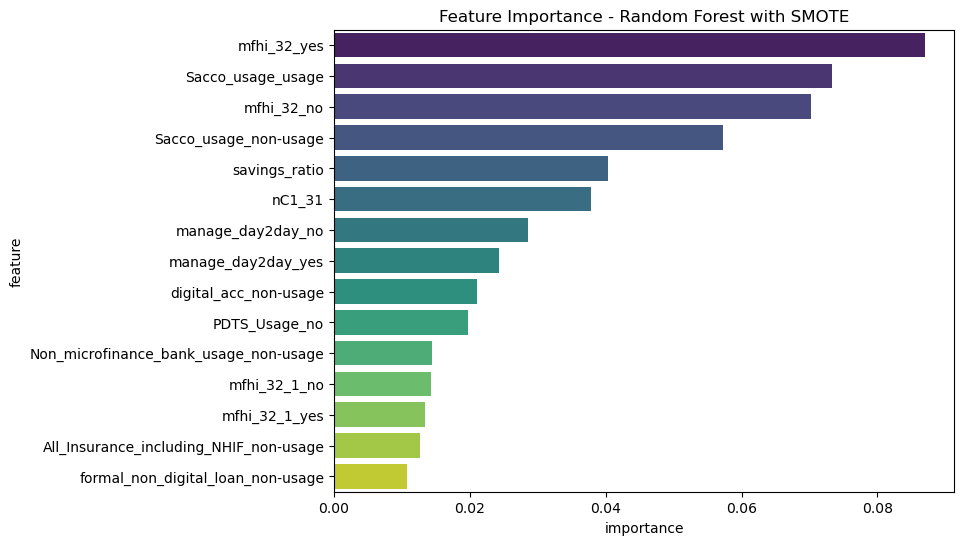

Model expects 954 features, got 958 names


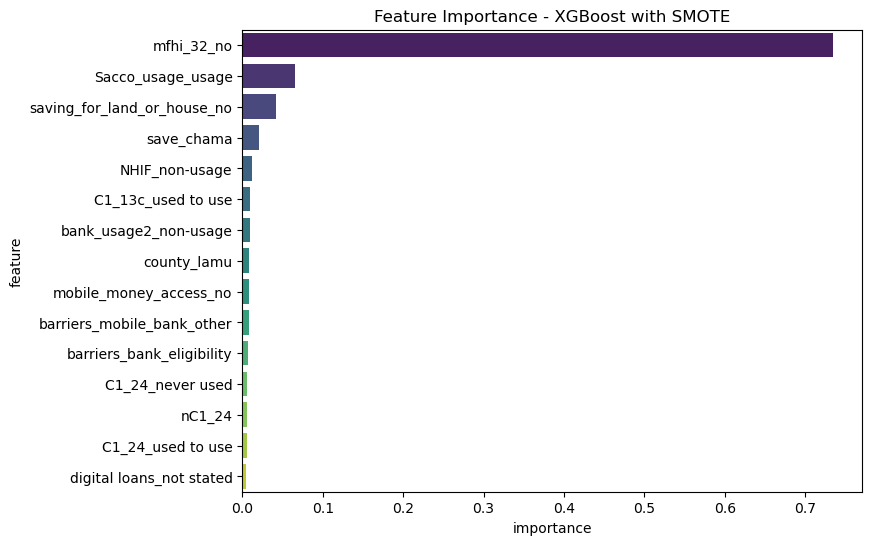

Model expects 954 features, got 958 names


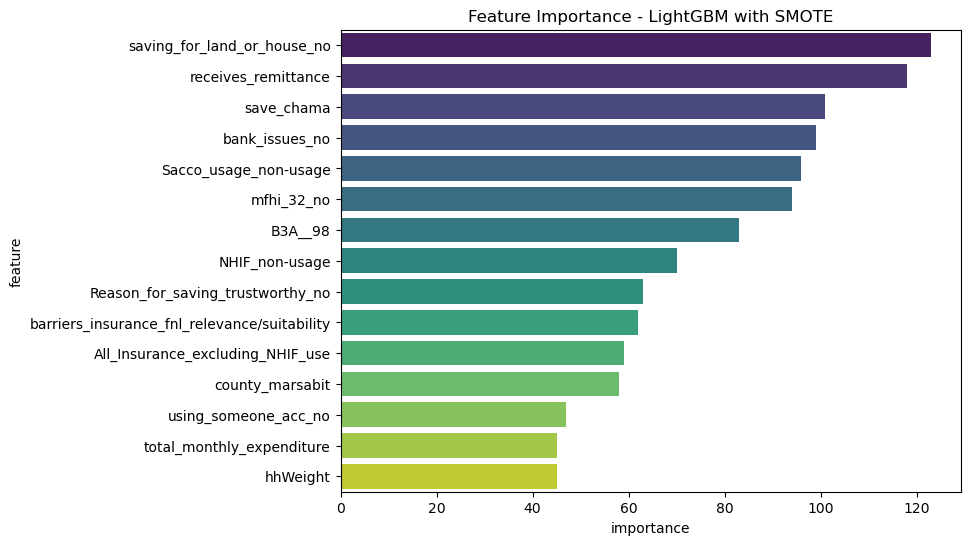

In [188]:
plot_feature_importance(rf_trainer, all_feature_names)
plot_feature_importance(xgb_trainer, all_feature_names)
plot_feature_importance(lgb_trainer, all_feature_names)


###  Model Explainability with SHAP

In this step, we use **SHAP (SHapley Additive exPlanations)** to understand how individual features influence model predictions.

- We apply `TreeExplainer` to both:
  - Random Forest
  - XGBoost
- We compute SHAP values on a **small sample** (first 100 rows) for speed.
- Then we plot SHAP summary plots to visualize:
  - Which features contribute most to higher/lower predictions
  - The direction of each feature's effect

---

 This improves transparency and helps communicate model reasoning to non-technical stakeholders.


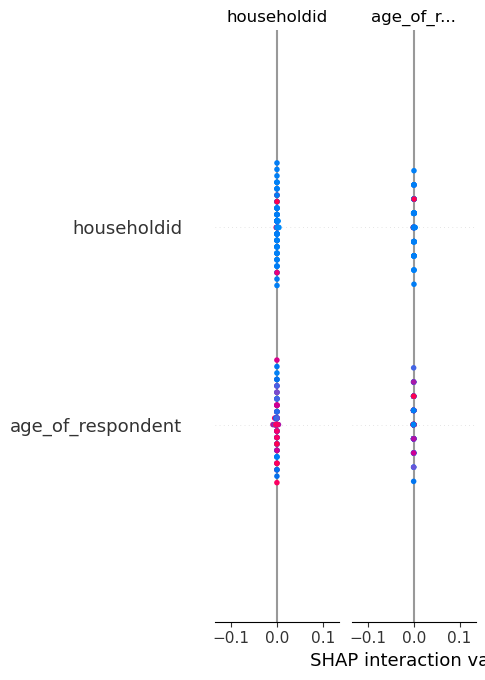

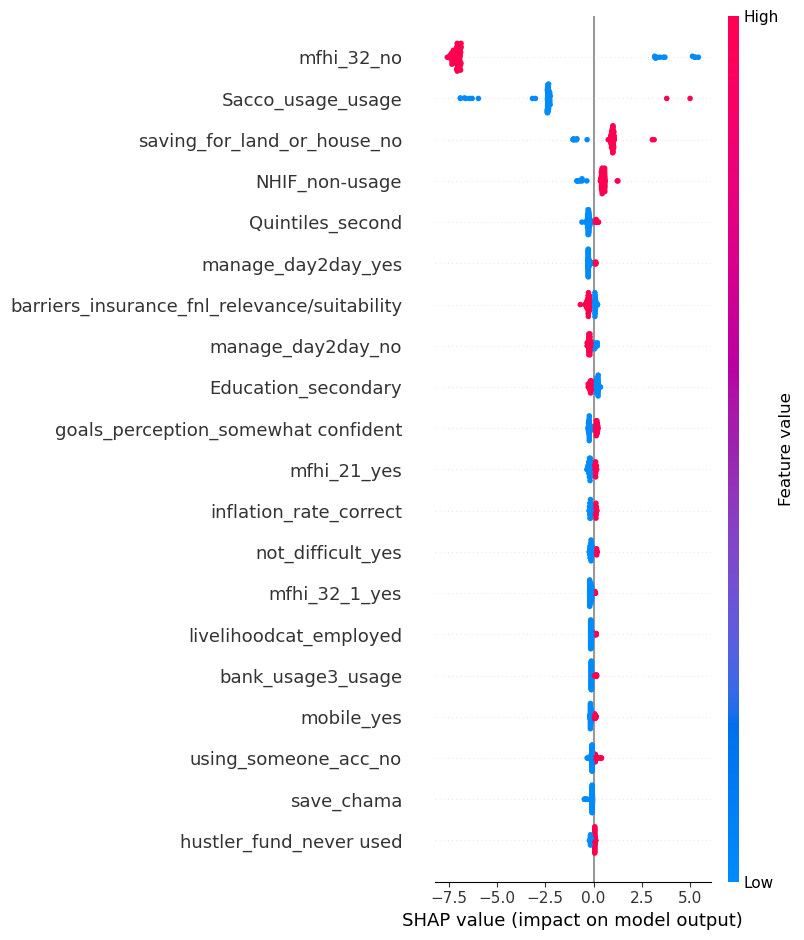

In [189]:
import shap

# Use TreeExplainer
explainer_rf = shap.TreeExplainer(rf_trainer.trained_model)
explainer_xgb = shap.TreeExplainer(xgb_trainer.trained_model)

# Compute SHAP values (on a small sample for speed)
shap_values_rf = explainer_rf.shap_values(X_test_transformed[:100])
shap_values_xgb = explainer_xgb.shap_values(X_test_transformed[:100])

# Summary plot: Random Forest
shap.summary_plot(shap_values_rf, features=X_test_transformed[:100], feature_names=all_feature_names)

# Summary plot: XGBoost
shap.summary_plot(shap_values_xgb, features=X_test_transformed[:100], feature_names=all_feature_names)


### Model Comparison Summary

In this section, we **evaluate and compare** all trained models side by side.

We calculate and store the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **ROC AUC**

This helps identify which model performs best overall and which trade-offs exist between precision and recall.

---


In [190]:
# Example: create summary DataFrame
results = []

for trainer in [rf_trainer, logreg_trainer, xgb_trainer, lgb_trainer]:
    model = trainer.trained_model
    y_pred = model.predict(X_test_transformed)
    y_prob = model.predict_proba(X_test_transformed)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    results.append({
        'Model': trainer.model_name,
        'Accuracy': round(accuracy,4),
        'Precision': round(precision,4),
        'Recall': round(recall,4),
        'ROC AUC': round(auc,4) if auc else None
    })

results_df = pd.DataFrame(results)
display(results_df)


Model  Accuracy  Precision  Recall  ROC AUC
0        Random Forest with SMOTE    0.9950     1.0000  0.8142   0.9992
1  Logistic Regression with SMOTE    0.9959     0.9898  0.8584   0.9964
2              XGBoost with SMOTE    0.9995     1.0000  0.9823   0.9998
3             LightGBM with SMOTE    0.9995     1.0000  0.9823   0.9998

 Summary table helps guide final model selection based on balanced metrics.


---
##  Saving Models & Preprocessing Pipeline

In this step, we export:
- The fitted **preprocessing pipeline**
- All trained models:  
   Random Forest  
   Logistic Regression  
   XGBoost  
   LightGBM

This makes it easy to reload and use them later for predictions or deployment.

---


In [191]:
import joblib
import os

#  Define your output directory (your folder named 'Models')
output_dir = 'models'  

# Create it if it doesn’t exist
os.makedirs(output_dir, exist_ok=True)

#  Save each model independently
joblib.dump(prep.preprocessor, os.path.join(output_dir, 'preprocessor.pkl'))
joblib.dump(rf_trainer.trained_model, os.path.join(output_dir, 'random_forest_model.pkl'))
joblib.dump(logreg_trainer.trained_model, os.path.join(output_dir, 'logistic_regression_model.pkl'))
joblib.dump(xgb_trainer.trained_model, os.path.join(output_dir, 'xgboost_model.pkl'))
joblib.dump(lgb_trainer.trained_model, os.path.join(output_dir, 'lightgbm_model.pkl'))

print(f" All models and preprocessor saved to '{output_dir}'")


 All models and preprocessor saved to 'models'


---
